<b>Fourier Analysis of Selected Sensor</b>


In [54]:
#Imports

import pandas as pd
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
import numpy as np
import math
import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [8]:
#Load Files

all_files=[]
import os
for root, dirs, files in os.walk("../data/"):
    for file in files:
        if file.endswith(".csv"):
             all_files.append(os.path.join(root, file))

dfs=[]
for path in all_files:
    df = pd.read_csv(path,sep=';',parse_dates=True)
    df['datetime'] = df['datetime'].apply(pd.to_datetime)
    for i in range(len(df)):
        df['timedelta'] = df['datetime'] - df['datetime'][0]
    dfs.append(df)
print('Features:')
for col in dfs[2].columns:
    print('\t',col)

Features:
	 datetime
	 Accelerometer1RMS
	 Accelerometer2RMS
	 Current
	 Pressure
	 Temperature
	 Thermocouple
	 Voltage
	 Volume Flow RateRMS
	 anomaly
	 changepoint
	 timedelta


In [30]:
variable = str(input('Choose a variable from the list above'))
experiment = int(input('Choose an experiment # from 0 to {}'.format(len(dfs)-1)))

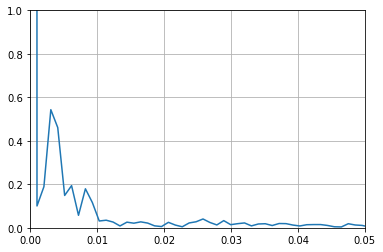

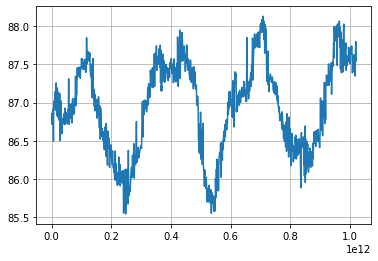

In [42]:
N = len(dfs[experiment])
T = 1.0
yf = fft(dfs[experiment][variable].tolist())
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.ylim([0, 1])
plt.xlim([0,0.05])
plt.grid()
plt.show()
plt.plot(dfs[experiment]['timedelta'], dfs[experiment][variable])
plt.xticks(label=['timedelta'])
plt.grid()
plt.show()

In [64]:
peaks = find_peaks(yf, prominence=100)
peaks_pos = peaks[0]
peaks_pos = [x for x in peaks_pos if x <= len(xf)]
freqs = xf[peaks_pos]
periods = 1 / freqs
print('The periods are {} seconds'.format(periods))

The periods are [322.66666667 107.55555556] seconds


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\scipy\signal\_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
